In [2]:
from datasets import load_dataset , load_from_disk
import numpy as np
import matplotlib.pylab as plt
import PIL
import cv2
# from google.colab import drive

In [3]:
# !pip install datasets

In [4]:
# drive.mount('/content/drive')

## Load dataset

In [5]:
# ds = load_dataset("Taquito07/plant_classification_v11")

In [6]:
folder= '/content/drive/MyDrive/Colab Notebooks/Dataset'
# ds.save_to_disk(folder)

In [7]:
ds = load_from_disk(folder)

In [8]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3691
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 539
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 268
    })
})

In [9]:
label_names = ds['train'].features['label'].names
label_names

['Unlabeled',
 'basil',
 'blueash',
 'boxelder',
 'cilantro',
 'daisy',
 'mint',
 'oak leaves',
 'oregano',
 'parsely',
 'poison ivy',
 'poison oak',
 'rose',
 'tulip']

In [10]:
label_dic={ i:label for i,label in enumerate(label_names) }
label_dic

{0: 'Unlabeled',
 1: 'basil',
 2: 'blueash',
 3: 'boxelder',
 4: 'cilantro',
 5: 'daisy',
 6: 'mint',
 7: 'oak leaves',
 8: 'oregano',
 9: 'parsely',
 10: 'poison ivy',
 11: 'poison oak',
 12: 'rose',
 13: 'tulip'}

In [11]:
train_images = ds['train']['image']
train_labels = ds['train']['label']

test_images = ds['test']['image']
test_labels = ds['test']['label']

validation_images = ds['validation']['image']
validation_labels = ds['validation']['label']


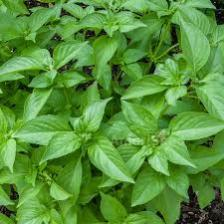

In [12]:
train_images[10]

In [13]:
train_labels[10]

1

## Preprocessing

In [14]:
np.array(train_images[10]).shape

(224, 224, 3)

In [15]:
img=np.array(train_images[10])
img.shape

(224, 224, 3)

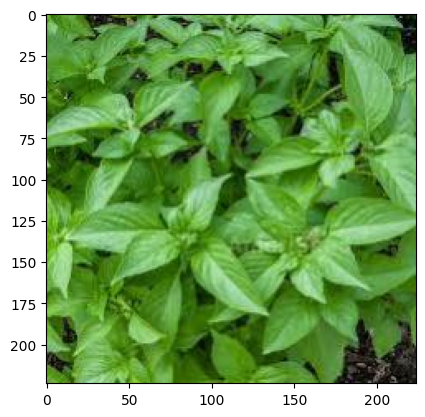

In [16]:
plt.imshow(img)
plt.show()

In [17]:
grayscaled_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled_img.shape

(224, 224)

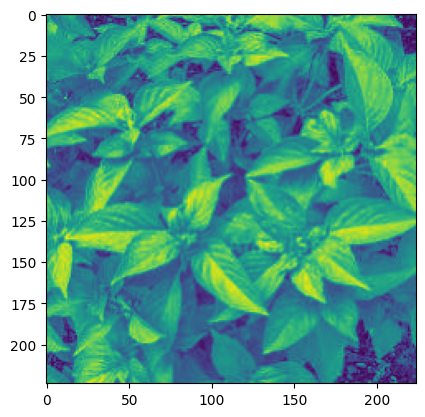

In [18]:
plt.imshow(grayscaled_img)
plt.show()

In [19]:
grayscaled_img_rescaled = grayscaled_img / 255
grayscaled_img_rescaled.shape

(224, 224)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:

from tensorflow.keras.preprocessing import image
img_size=(224,224)
def preprocess_images(img):
  img=image.img_to_array(img)
  img=data_augmentation.random_transform(img)
  img=image.smart_resize(img,img_size)
  img=img/255
  return img


In [22]:
train_pp_images=[preprocess_images(img) for img in train_images]
test_pp_images=[preprocess_images(img) for img in test_images]
val_pp_images=[preprocess_images(img) for img in validation_images]

In [23]:
len(train_pp_images) , len(test_pp_images), len(val_pp_images)


(3691, 268, 539)

In [24]:
len(train_pp_images) , len(train_labels)

(3691, 3691)

In [25]:
train_pp_images[0].shape

(224, 224, 3)

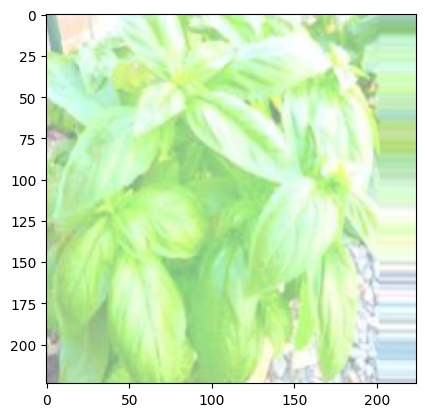

In [26]:
plt.imshow(train_pp_images[25])

## CNN Model building

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


In [28]:
train_labels_one_hot = to_categorical(train_labels,14)
validation_labels_one_hot = to_categorical(validation_labels,14)

In [29]:
min(train_labels),max(train_labels) ,min(validation_labels),max(validation_labels)

(0, 13, 0, 13)

In [30]:
len(train_pp_images) , len(train_labels_one_hot) , len(val_pp_images),len(validation_labels_one_hot)

(3691, 3691, 539, 539)

In [31]:
train_labels_one_hot[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
train_labels_one_hot[0].shape

(14,)

In [33]:
# train_pp_images_resized = [cv2.resize(img, (244, 244)) for img in train_pp_images]
# train_pp_images_resized = np.array(train_pp_images_resized).reshape(-1, 244, 244, 1)

# val_pp_images_resized = [cv2.resize(img, (244, 244)) for img in val_pp_images]
# val_pp_images_resized = np.array(val_pp_images_resized).reshape(-1, 244, 244, 1)

# test_pp_images_resized = [cv2.resize(img, (244, 244)) for img in test_pp_images]
# test_pp_images_resized = np.array(test_pp_images_resized).reshape(-1, 244, 244, 1)

In [34]:
model = Sequential()

model.add(Conv2D(32,(2,2),activation='relu',input_shape=(224,224,3) , kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(14,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 193600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      24,780,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │             462 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,800,398 (94.61 MB)

 Trainable params: 24,800,398 (94.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
Train = model.fit(np.array(train_pp_images),
                    train_labels_one_hot,
                    epochs=10,
                    batch_size=32,
                    validation_data=(np.array(val_pp_images),validation_labels_one_hot),
                    verbose=1)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.1398 - loss: 3.4046 - val_accuracy: 0.2801 - val_loss: 2.2612
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.2451 - loss: 2.2593 - val_accuracy: 0.3228 - val_loss: 2.0572
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.2909 - loss: 2.0972 - val_accuracy: 0.3377 - val_loss: 2.0057
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.3092 - loss: 1.9851 - val_accuracy: 0.3377 - val_loss: 1.9130
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3644 - loss: 1.8437 - val_accuracy: 0.3581 - val_loss: 1.8770
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4004 - loss: 1.7089 - val_accuracy: 0.3748 - val_loss: 1.9072
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.4853 - loss: 1.4748 - val_accuracy: 0.3618 - val_loss: 1.9293
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.5569 - loss: 1.3222 - va

In [38]:
model.save('/content/drive/MyDrive/Colab Notebooks/plant_classification.h5')

In [39]:
# test_pp_images=tf.expand_dims(test_pp_images,0)
ans=model.predict(np.array(test_pp_images))
ans=tf.nn.softmax(ans)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


In [40]:
test_pp_images[0].shape

(224, 224, 3)

In [41]:
y_pred=[np.argmax(res) for res in ans]

In [42]:
len(y_pred) , len(test_labels)

(268, 268)

In [43]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test_labels,y_pred)
acc

0.34701492537313433